<a href="https://colab.research.google.com/github/viswapani/Blackelephant/blob/main/Titanic_dataset_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Exploratory Data Analysis (EDA) - Titanic dataset:
- Analyze the Titanic dataset's structure and characteristics using visualizations such as
histograms, scatter plots, and correlation matrices.
- Gain insights into the distribution of variables, relationships between features, and potential
patterns within the data.


Questions:
- Address the following questions using appropriate visualizations and interpretations:
1. What is the distribution of passenger ages on the Titanic?
2. How does the survival rate vary based on passenger class (Pclass)?
3. Is there a relationship between the fare paid and the likelihood of survival?
4. How does the survival rate differ between male and female passengers?
5. What impact does the number of siblings/spouses (SibSp) or parents/children
(Parch) aboard have on survival?
6. Are there any significant differences in survival rates among passengers embarked
from different ports?

In [3]:
#1. Setup and Data Loading:
# Import necessary libraries: pandas, matplotlib, and seaborn.
# Load the Titanic dataset for visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Data Loading
df = pd.read_csv('/content/train.csv')

In [5]:
# View dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


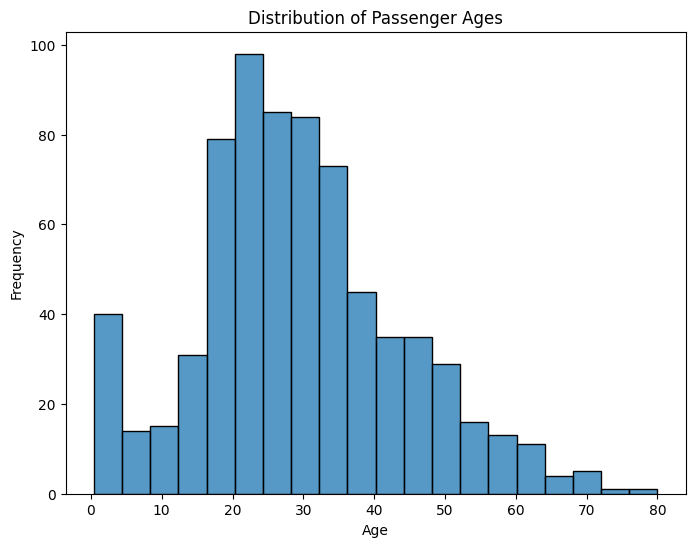

In [7]:
# 1. What is the distribution of passenger ages on the Titanic?
# Histogram is one way to show distribution how many times each range of values (bins) appears in dataset
# Use column - Age for this visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=20)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
# 2. How does the survival rate vary based on passenger class (Pclass)?
# We need find out passenger class influenced survival rate
# We need to do visualization using Survived, Pclass
# First need to group data by Pclass
group_by_PClass = df.groupby('Pclass')
# Calculate % of survival by Pclass
pclass_survival_rate = group_by_PClass['Survived'].mean()*100
print(pclass_survival_rate)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


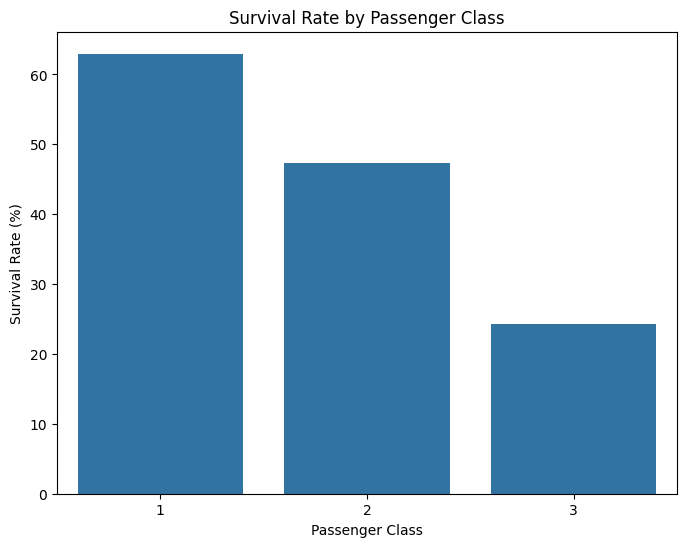

In [17]:
# create a visualization for Pclass and suvival rate
# we will create bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=pclass_survival_rate.index, y=pclass_survival_rate.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

3. Is there a relationship between the fare paid and the likelihood of survival?

To explore the relationship between the fare paid and the likelihood of survival on the Titanic, we can use a scatter plot. This visualizations help in understanding if there's a correlation between how much passengers paid and their survival rate.

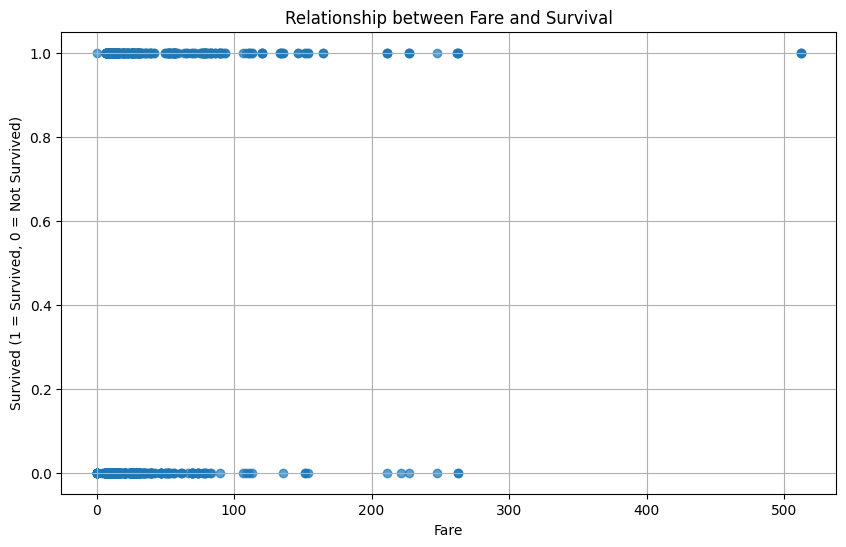

In [20]:
# Scatter plot between fare and survived
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Fare'], df['Survived'], alpha=0.7)
plt.title('Relationship between Fare and Survival')
plt.xlabel('Fare')
plt.ylabel('Survived (1 = Survived, 0 = Not Survived)')
plt.grid(True)
plt.show()

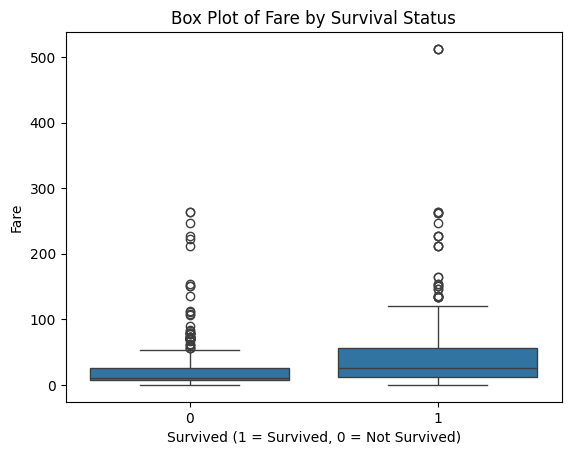

In [27]:
# Create a box plot
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Box Plot of Fare by Survival Status')
plt.xlabel('Survived (1 = Survived, 0 = Not Survived)')
plt.ylabel('Fare')
plt.show()

4. How does the survival rate differ between male and female passengers?

bar chart is a simple way of visulizing by creating a data set survival rates


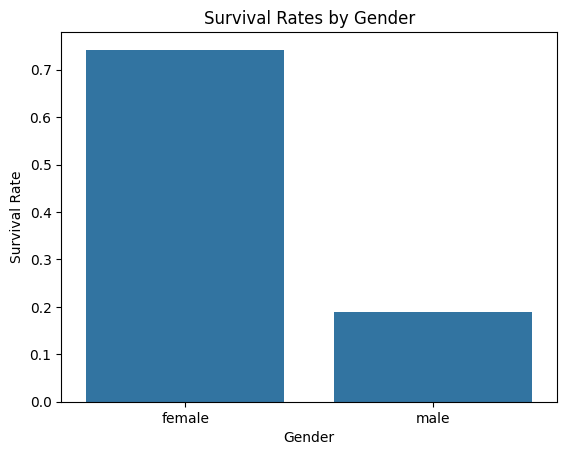

In [30]:
# Calculate survival rates
survival_rates = df.groupby('Sex')['Survived'].mean()

# Create a bar chart
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

5. What impact does the number of siblings/spouses (SibSp) or parents/children (Parch) aboard have on survival?

Create a dataset of family size and creat a df of survival rates by sibsp and parch and plot family size vs survial rate

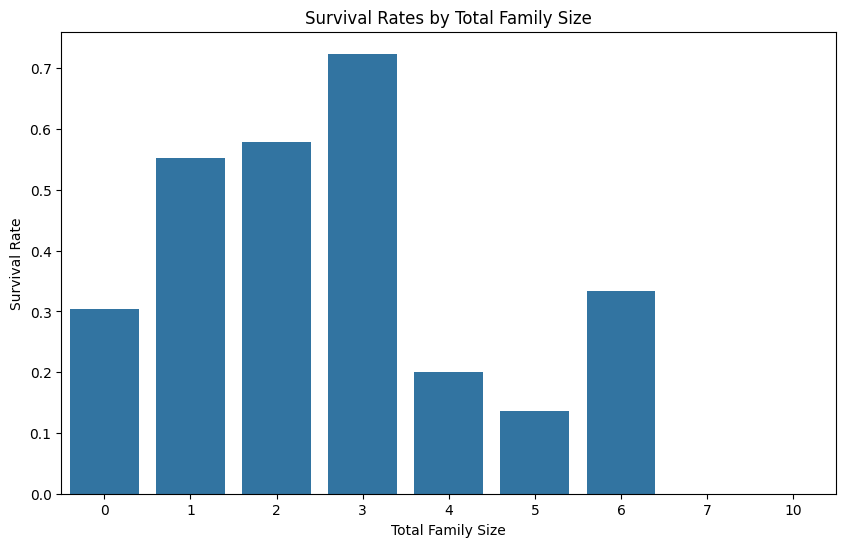

In [35]:
# Create a new column for total family size
df['FamilySize'] = df['SibSp'] + df['Parch']

# Calculate survival rates
survival_rates = df.groupby('FamilySize')['Survived'].mean()

# Create a bar plot for survival rate by total family size
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Total Family Size')
plt.xlabel('Total Family Size')
plt.ylabel('Survival Rate')
plt.show()

6. Are there any significant differences in survival rates among passengers embarked from different ports?

A bar chart can be used for comparing the survival rates across different passengers embarking from each port.

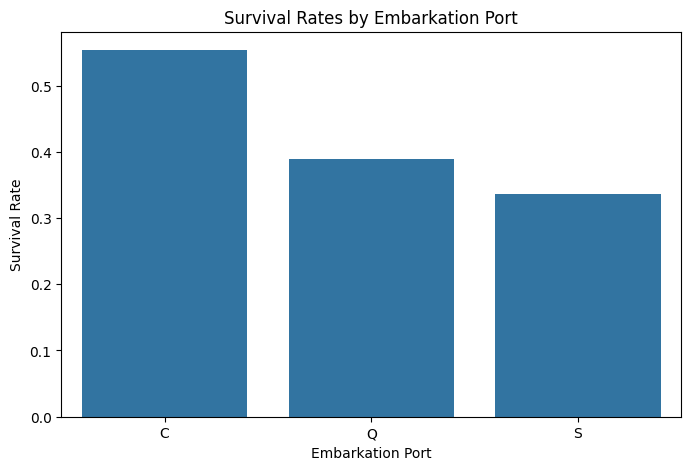

In [36]:
# Calculate survival rates by embarkation port
port_survival = df.groupby('Embarked')['Survived'].mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=port_survival.index, y=port_survival.values)
plt.title('Survival Rates by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()